In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [3]:
df = pd.read_excel('TICrxns_vs_TICs.xlsx')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Model,nTICRxns,nTICs,Incomplete
0,RECON1,958,792,1
1,Recon3D,2409,2738,1
2,iAT_PLT_636,365,2283,1
3,iCHOv1,1882,132,1
4,iCHOv1_DG44,768,1583,1


C:\Users\rxpav\AppData\Local\Temp\ipykernel_28688\2816437187.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=9,fontweight='bold')
C:\Users\rxpav\AppData\Local\Temp\ipykernel_28688\2816437187.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(),fontsize=9,fontweight='bold')


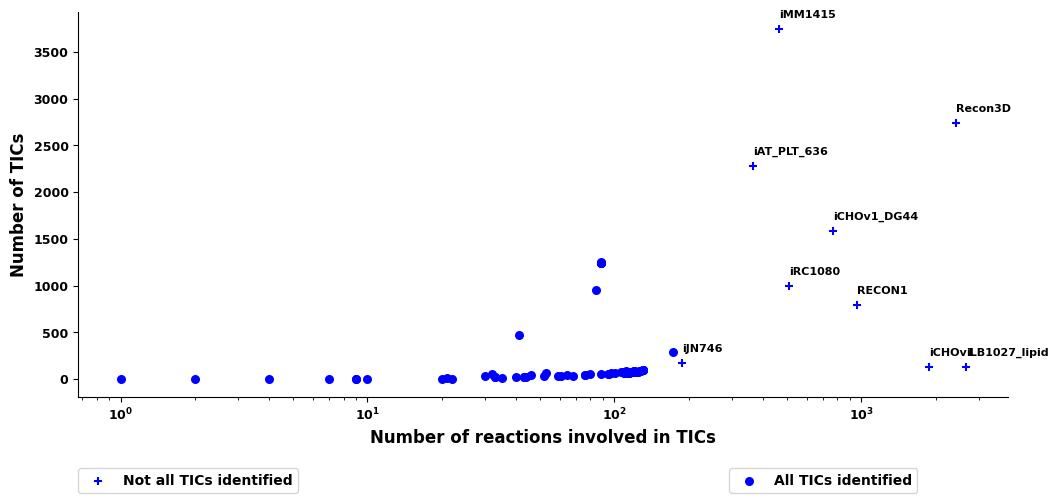

In [9]:
fig,ax =plt.subplots(1,1,figsize=(12,5))
xl=[]
xt=[]
for i in range(len(df['Model'])):
  m = df['Model'][i]
  x=df['nTICRxns'][i]
  y=df['nTICs'][i]
  xt.append(x)
  xl.append(m)
  if df['Incomplete'][i]==1:
    ax.scatter(x,y,s=30,marker='+',c='b',label = 'Not all TICs identified')
    ax.text(x, y+100, m, ha='left', va='bottom', fontsize=8,fontweight='bold')
  else: 
    ax.scatter(x,y,s=30,marker='o',c='b',label = 'All TICs identified')
ax.set_ylabel("Number of TICs",fontweight='bold',fontsize=12)
ax.set_xlabel("Number of reactions involved in TICs",fontweight='bold',fontsize=12)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xticks(xt)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=9,fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(),fontsize=9,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles1, labels1 = ax.get_legend_handles_labels()

# Filter entries for  legend
handles2 = [handles1[i] for i,label in enumerate(labels1) if 'Not all' in label]
labels2 = [label for label in labels1 if 'Not all' in label]

# Filter entries for  legend
handles0 = [handles1[i] for i,label in enumerate(labels1) if 'All TICs' in label]
labels0 = [label for label in labels1 if 'All TICs' in label]

# Create second legend (below x-axis)
tp = plt.legend([handles0[-1]], [labels0[-1]], loc=(0.7, -0.25),prop={'weight':'bold'})
plt.legend([handles2[-1]], [labels2[-1]], loc=(0, -0.25),prop={'weight':'bold'})

plt.gca().add_artist(tp)

# ax.spines['bottom'].set_visible(False)
plt.savefig('TICs_vs_TICRxns.pdf',bbox_inches='tight')